Filtering out Edges

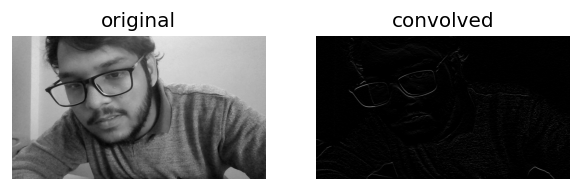

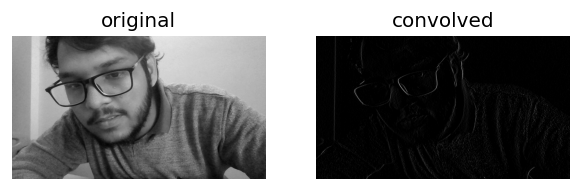

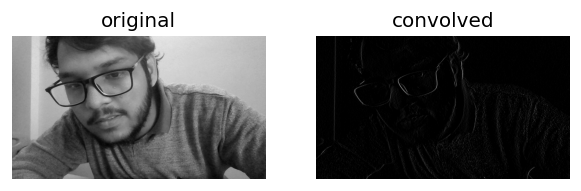

In [13]:
import numpy as np
import torch
import torch.nn.functional as F
import cv2
# import tqdm
import matplotlib.pyplot as plt
#  creating a Prewitt horizontal filter
prewitt_horizontal_filter = np.array([[-1, -1, -1],
                                      [0, 0, 0],
                                      [1, 1, 1]])


def convolve(image_filepath, filter, title=''):
    """
    This function performs convolution and
    returns both the original and convolved
    images.
		"""
	
    #  reading image in grayscale format
    image = cv2.imread(image_filepath, cv2.IMREAD_GRAYSCALE)

    #  defining filter size
    filter_size = filter.shape[0]

    #  creating an array to store convolutions (x-m+1, y-n+1)
    convolved = np.zeros(((image.shape[0] - filter_size) + 1, 
                      (image.shape[1] - filter_size) + 1))
    
    #  performing convolution
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        try:
          convolved[i,j] = (image[i:(i+filter_size),
                                  j:(j+filter_size)] * filter).sum()
        except Exception:
          pass

    #  converting to tensor
    convolved = torch.tensor(convolved)
    #  applying relu activation
    convolved = F.relu(convolved)

    #  producing plots
    figure, axes = plt.subplots(1,2, dpi=120)
    plt.suptitle(title)
    axes[0].imshow(image, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title('original')
    axes[1].imshow(convolved, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('convolved')
    pass


# utilizing the horizontal filter
convolve('./WIN_20221009_10_30_30_Pro.jpg', prewitt_horizontal_filter)
prewitt_vertical_filter = np.array([[-1, 0, 1],
                                    [-1, 0, 1],
                                    [-1, 0, 1]])
sobel_horizontal_filter = np.array([[-1, 0, 1],
                                    [-2, 0, 2],
                                    [-1, 0, 1]])

convolve('./WIN_20221009_10_30_30_Pro.jpg',prewitt_vertical_filter)

convolve('./WIN_20221009_10_30_30_Pro.jpg',sobel_horizontal_filter)


Below clode saves clipbaord images from cropped SS

In [4]:
from PIL import ImageGrab

img = ImageGrab.grabclipboard()
        
# Save the image to disk
img.save('paste.png', 'PNG')


Another code to extract image features using kernals.